<h1 id='stellar-classification'>stellar classification</h1>


projek ini merupakan tugas akhir semester mata kuliah data sains. pada projek ini saya mengklasifikasikan galaksi, quasar, dan bintang dari data hasil pengamatan luar angkas yang diambil oleh SDSS (Sloan Digital Sky Survey). Data terdiri dari 100000 pengamatan. setiap pengamatan dijelaskan oleh 17 kolom fitur dan 1 kolom kelas yang mengidentifikasi sebagai bintang, galaksi, atau quasar.

sumber data : https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

## import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

<h2 id='load-data'>Load Data</h2>

In [2]:
df = pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


<h2 id='EDA'>Exploratory Data Analysis</h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
# cek apakah ada data yang duplikat
duplicated_rows = df[df.duplicated()]
duplicated_rows.shape

(0, 18)

In [5]:
# cek apakah ada missing value atau data yang kosong
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [6]:
# tipe data
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [7]:
enc = OrdinalEncoder()
df['class'] = enc.fit_transform(df[['class']])


### Outlier

obj_ID


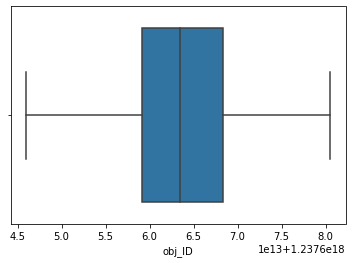

alpha


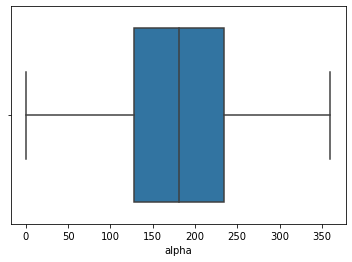

delta


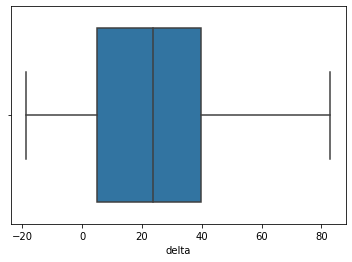

u


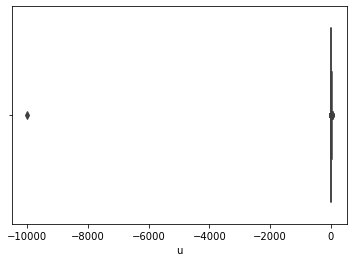

g


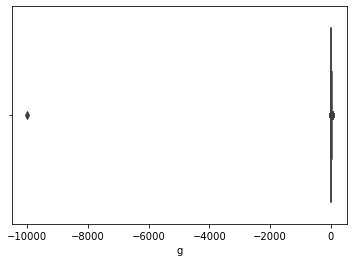

r


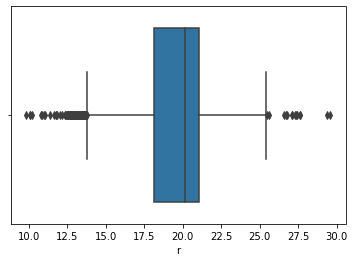

i


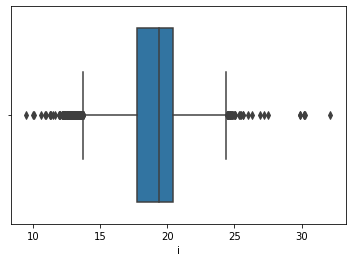

z


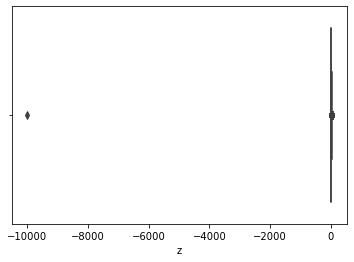

run_ID


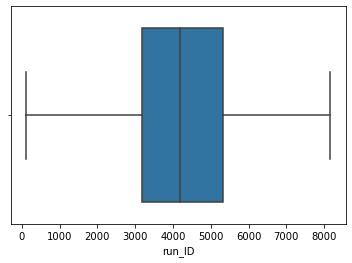

rerun_ID


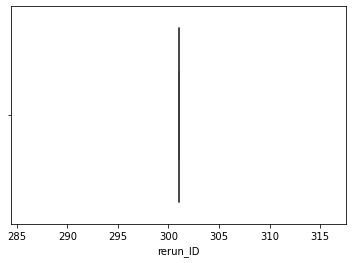

cam_col


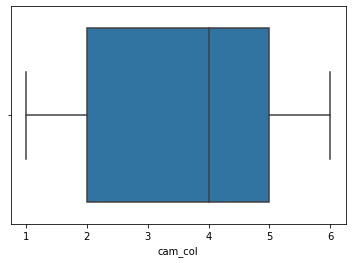

field_ID


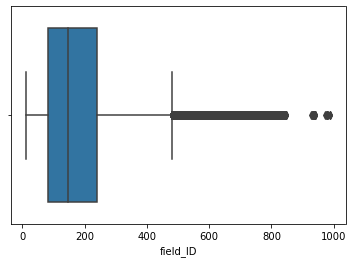

spec_obj_ID


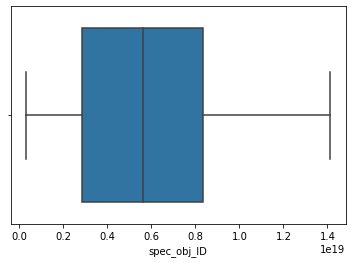

class


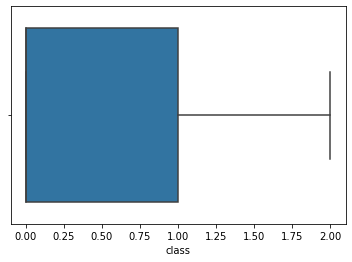

redshift


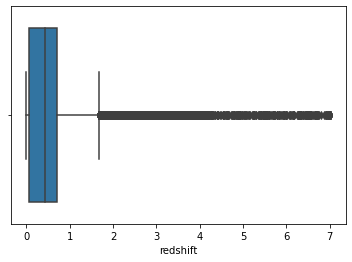

plate


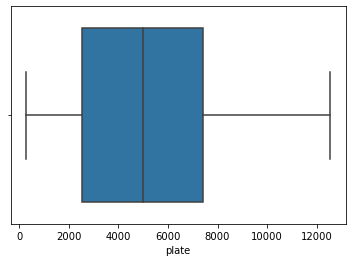

MJD


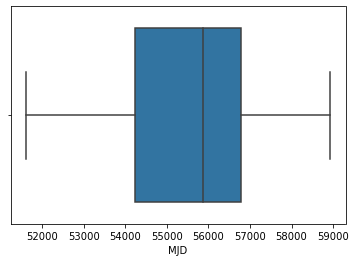

fiber_ID


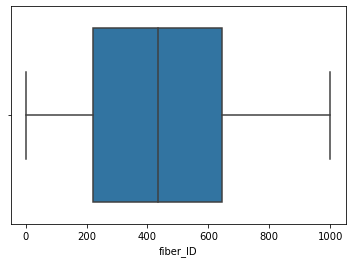

In [11]:
# cek data outlier
for i in range(len(df.columns)):
    sns.boxplot(x=df[df.columns[i]])
    print(df.columns[i])
    plt.show()

In [12]:
# fungsi untuk mengganti data outlier dengan nilai percentil ke-90 atau ke-10
def outlier(data):
    for feature in data.columns:
        q1 = np.quantile(data[feature], .25)
        q3 = np.quantile(data[feature], .75)
        
        p1 = np.quantile(data[feature], .1)
        p9 = np.quantile(data[feature], .9)
        
        iqr = q3 - q1
        
        min_iqr = q1 - iqr*1.5
        max_iqr = q3 + iqr*1.5
        
        for row in data.index:
            if data.loc[row, feature] < min_iqr:
                 data.loc[row, feature] = p1
            elif  data.loc[row, feature] > max_iqr:
                 data.loc[row, feature] = p9
                

In [12]:
df_clean = df.copy()

In [13]:
outlier(data=df)

obj_ID


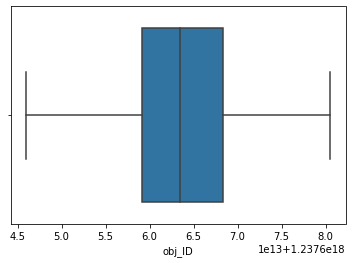

alpha


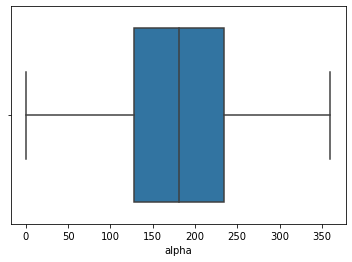

delta


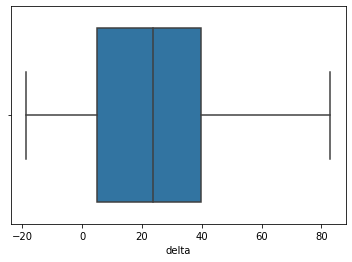

u


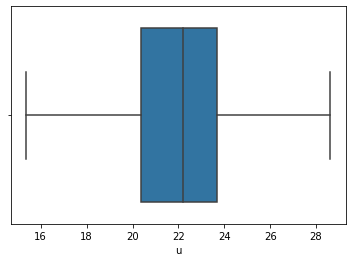

g


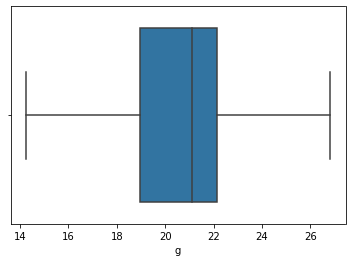

r


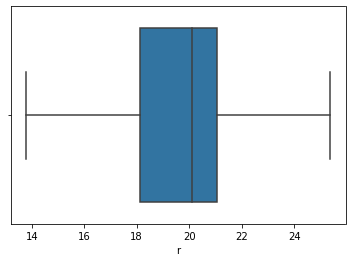

i


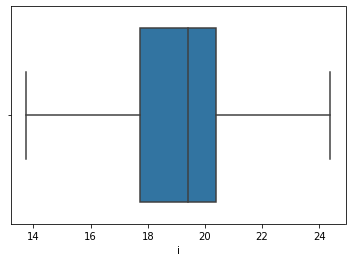

z


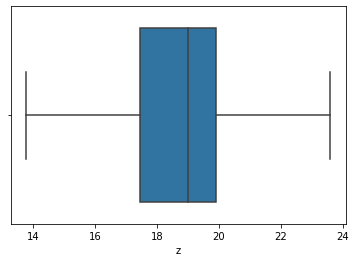

run_ID


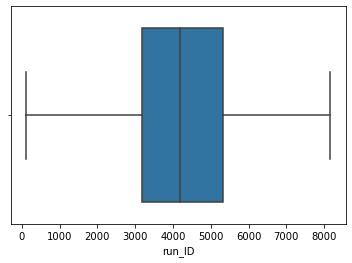

rerun_ID


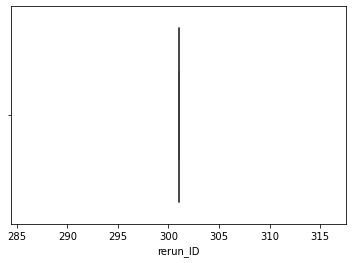

cam_col


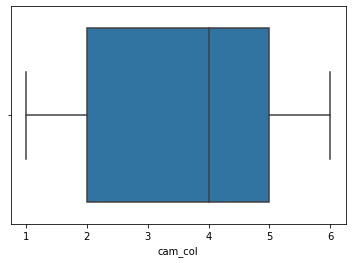

field_ID


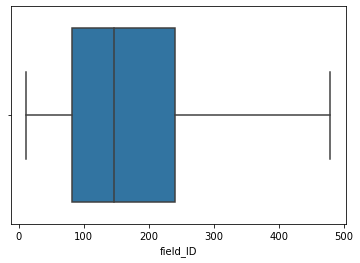

spec_obj_ID


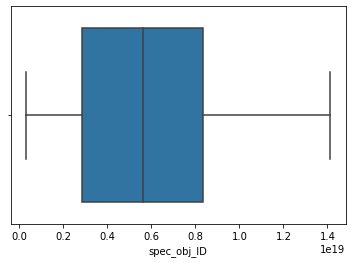

class


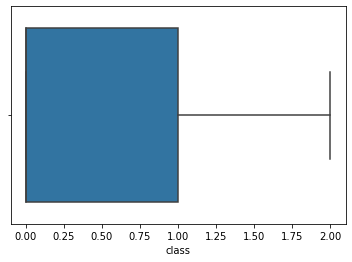

redshift


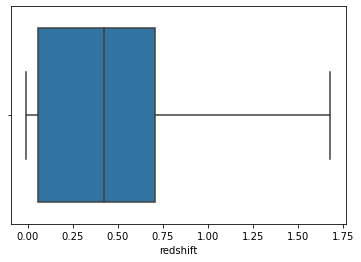

plate


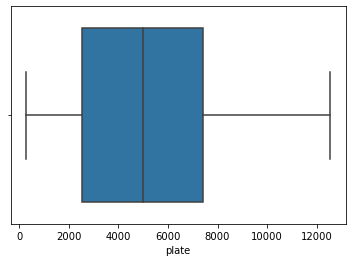

MJD


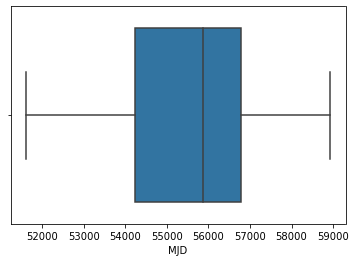

fiber_ID


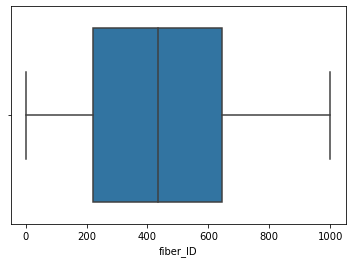

In [14]:
for i in range(len(df.columns)):
    sns.boxplot(x=df[df.columns[i]])
    print(df.columns[i])
    plt.show()

## data normalization

In [16]:
X = df.drop(columns=['class'])
y = df.loc[:, ['class']]

In [17]:
X.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842


In [18]:
y.head()

,class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### Min-Max Scaler

data yang di normalisasi menggunakan min-max scaler untuk digunakan dalam pemilihan fitur

In [19]:
minmax = MinMaxScaler()
scaled = minmax.fit_transform(X)
scaled = pd.DataFrame(scaled, columns=X.columns)
scaled.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,0.434203,0.376905,0.503802,0.642678,0.638802,0.570554,0.509751,0.510806,0.434248,0.0,0.2,0.145299,0.451585,0.381862,0.451592,0.648007,0.170170
1,0.547496,0.402286,0.491812,0.710434,0.683063,0.759271,0.697750,0.797847,0.547498,0.0,0.8,0.230769,0.828833,0.467349,0.828841,0.894320,0.426426
2,0.434203,0.394960,0.534139,0.747032,0.669704,0.589065,0.526918,0.526535,0.434248,0.0,0.2,0.232906,0.350946,0.387430,0.350949,0.543965,0.298298
3,0.506985,0.940947,0.180600,0.511355,0.758187,0.675419,0.635448,0.557252,0.507016,0.0,0.4,0.433761,0.723313,0.558088,0.723312,0.878072,0.774775
4,0.992503,0.959118,0.392679,0.307839,0.265441,0.234608,0.210380,0.180154,0.992549,0.0,0.4,0.269231,0.476759,0.074679,0.476753,0.625205,0.841842


In [20]:
data_minmax_scaler = y.join(scaled)
data_minmax_scaler.head()

,class,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,0.0,0.434203,0.376905,0.503802,0.642678,0.638802,0.570554,0.509751,0.510806,0.434248,0.0,0.2,0.145299,0.451585,0.381862,0.451592,0.648007,0.170170
1,0.0,0.547496,0.402286,0.491812,0.710434,0.683063,0.759271,0.697750,0.797847,0.547498,0.0,0.8,0.230769,0.828833,0.467349,0.828841,0.894320,0.426426
2,0.0,0.434203,0.394960,0.534139,0.747032,0.669704,0.589065,0.526918,0.526535,0.434248,0.0,0.2,0.232906,0.350946,0.387430,0.350949,0.543965,0.298298
3,0.0,0.506985,0.940947,0.180600,0.511355,0.758187,0.675419,0.635448,0.557252,0.507016,0.0,0.4,0.433761,0.723313,0.558088,0.723312,0.878072,0.774775
4,0.0,0.992503,0.959118,0.392679,0.307839,0.265441,0.234608,0.210380,0.180154,0.992549,0.0,0.4,0.269231,0.476759,0.074679,0.476753,0.625205,0.841842


###  Standasardization (Z-Score normalization)

data di standarisasi untuk pembuatan model

In [21]:
std = StandardScaler()
scaled = std.fit_transform(X)
scaled = pd.DataFrame(scaled, columns=X.columns)
scaled.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,-0.445634,-0.434604,0.425529,0.800250,0.810083,0.404933,0.044021,0.010630,-0.445535,0.0,-0.952553,-0.829054,0.228609,0.273501,0.228633,0.423203,-1.021342
1,0.018740,-0.339921,0.363402,1.200576,1.084756,1.594585,1.196202,1.631422,0.018646,0.0,0.937920,-0.474728,1.797912,0.562585,1.797924,1.420729,-0.081883
2,-0.445633,-0.367251,0.582713,1.416816,1.001853,0.521620,0.149227,0.099445,-0.445535,0.0,-0.952553,-0.465870,-0.190037,0.292329,-0.190025,0.001854,-0.551612
3,-0.147311,1.669523,-1.249105,0.024337,1.550959,1.065992,0.814376,0.272887,-0.147278,0.0,-0.322395,0.366797,1.358962,0.869427,1.358942,1.354927,1.195196
4,1.842768,1.737310,-0.150242,-1.178124,-1.506922,-1.712840,-1.790721,-1.856417,1.842792,0.0,-0.322395,-0.315281,0.333328,-0.765275,0.333297,0.330860,1.441070


In [22]:
data_standardization = y.join(scaled)
data_standardization.head()

,class,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,0.0,-0.445634,-0.434604,0.425529,0.800250,0.810083,0.404933,0.044021,0.010630,-0.445535,0.0,-0.952553,-0.829054,0.228609,0.273501,0.228633,0.423203,-1.021342
1,0.0,0.018740,-0.339921,0.363402,1.200576,1.084756,1.594585,1.196202,1.631422,0.018646,0.0,0.937920,-0.474728,1.797912,0.562585,1.797924,1.420729,-0.081883
2,0.0,-0.445633,-0.367251,0.582713,1.416816,1.001853,0.521620,0.149227,0.099445,-0.445535,0.0,-0.952553,-0.465870,-0.190037,0.292329,-0.190025,0.001854,-0.551612
3,0.0,-0.147311,1.669523,-1.249105,0.024337,1.550959,1.065992,0.814376,0.272887,-0.147278,0.0,-0.322395,0.366797,1.358962,0.869427,1.358942,1.354927,1.195196
4,0.0,1.842768,1.737310,-0.150242,-1.178124,-1.506922,-1.712840,-1.790721,-1.856417,1.842792,0.0,-0.322395,-0.315281,0.333328,-0.765275,0.333297,0.330860,1.441070


## feature selection

projek ini saya menggunakan chi square untuk pemilihan fitur, dan saya hanya menggunakan 9 fitur terbaik untuk pembuatan model

In [23]:
X = data_minmax_scaler.drop(columns=['class'])
y = data_minmax_scaler.loc[:, 'class']

In [24]:
best_feature = SelectKBest(score_func=chi2, k=9)
fit = best_feature.fit(X, y)

In [26]:
feature_score = pd.DataFrame({
    'feature' : X.columns,
    'score': fit.scores_
})

In [27]:
feature_score.sort_values(by=['score'], ascending=False, inplace=True)
feature_score

,feature,score
13,redshift,21093.636560
14,plate,1365.314507
12,spec_obj_ID,1365.283990
7,z,1060.386300
15,MJD,912.613448
6,i,762.287759
3,u,437.769600
5,r,421.282340
4,g,351.223865
16,fiber_ID,143.588657


In [28]:
feature_score.fillna(0, inplace=True)


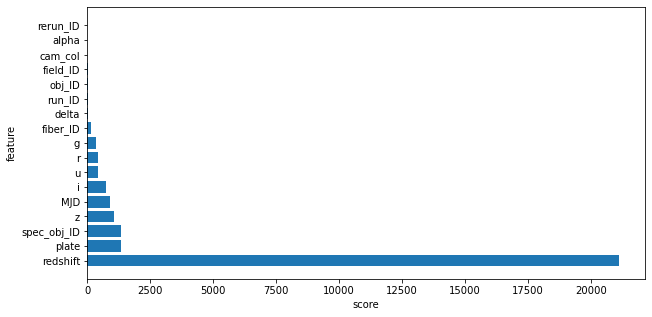

In [29]:
plt.figure(figsize=(10, 5))
plt.barh(feature_score['feature'], feature_score['score'])
plt.xlabel('score')
plt.ylabel('feature')
plt.show()

## model

projek ini saya menggunakan algoritma k nearst neighbor

metric yang saya gunakan yaitu euclidean dan manhattan untuk mencari metrics terbaik dan menggunakan nilai k dari 1 sampai 20

In [30]:
data_standardization.head()

,class,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,0.0,-0.445634,-0.434604,0.425529,0.800250,0.810083,0.404933,0.044021,0.010630,-0.445535,0.0,-0.952553,-0.829054,0.228609,0.273501,0.228633,0.423203,-1.021342
1,0.0,0.018740,-0.339921,0.363402,1.200576,1.084756,1.594585,1.196202,1.631422,0.018646,0.0,0.937920,-0.474728,1.797912,0.562585,1.797924,1.420729,-0.081883
2,0.0,-0.445633,-0.367251,0.582713,1.416816,1.001853,0.521620,0.149227,0.099445,-0.445535,0.0,-0.952553,-0.465870,-0.190037,0.292329,-0.190025,0.001854,-0.551612
3,0.0,-0.147311,1.669523,-1.249105,0.024337,1.550959,1.065992,0.814376,0.272887,-0.147278,0.0,-0.322395,0.366797,1.358962,0.869427,1.358942,1.354927,1.195196
4,0.0,1.842768,1.737310,-0.150242,-1.178124,-1.506922,-1.712840,-1.790721,-1.856417,1.842792,0.0,-0.322395,-0.315281,0.333328,-0.765275,0.333297,0.330860,1.441070


In [31]:
X = data_standardization.loc[:, ['redshift', 'plate', 'spec_obj_ID', 'z', 'MJD', 'i', 'u', 'r', 'g']]
y = data_standardization.loc[:, 'class']

In [32]:
# membagi data latih dan data tes
# data latih sebanyak 70% dan data tes sebanyak 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
k_neighbors = 20
metrics = ['euclidean', 'manhattan']

In [34]:
accuracy_total = []
for k in range(1, k_neighbors+1, 1):
    accuracy_k = []
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_k.append(accuracy)
    accuracy_total.append(accuracy_k)

In [35]:
accuracy_df = pd.DataFrame(np.array(accuracy_total), columns=metrics)

In [36]:
k_list = []
for k in range(1, k_neighbors+1):
    k_list.append(k)
    
k_df = pd.DataFrame(k_list, columns=['k'])

In [37]:
accuracy_join= k_df.join(accuracy_df)
accuracy_join

,k,euclidean,manhattan
0,1,0.947767,0.949600
1,2,0.947767,0.949600
2,3,0.956967,0.958733
3,4,0.957767,0.959700
4,5,0.957633,0.959633
5,6,0.958533,0.960167
6,7,0.957600,0.959267
7,8,0.958000,0.960233
8,9,0.957900,0.959033
9,10,0.957800,0.959533


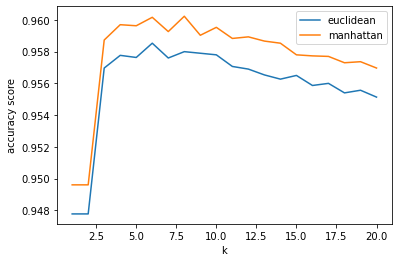

In [38]:
plt.plot(accuracy_join['k'], accuracy_join['euclidean'], label='euclidean')
plt.plot(accuracy_join['k'], accuracy_join['manhattan'], label='manhattan')

plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy score')
plt.show()

terlihat saat menggunakan metric manhattan dengan nilai k = 8 memperoleh akurasi tertinggi. karena itu digunakan metric manhattan dan nilai k = 8 untuk model

In [39]:
knn = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='manhattan')
knn.fit(X_train, y_train) # latih

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

In [40]:
# memprediksi
y_pred = knn.predict(X_test)

## validasi

In [41]:
accuracy_score(y_test, y_pred)

0.9602333333333334

In [42]:
cm = confusion_matrix(y_test, y_pred)

In [43]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['galaxy', 'quasar', 'star'])

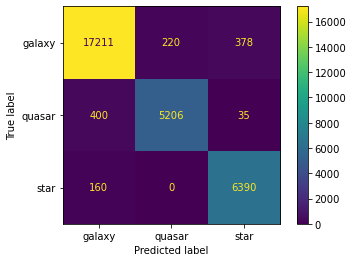

In [44]:
cm_disp.plot()

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     17809
         1.0       0.96      0.92      0.94      5641
         2.0       0.94      0.98      0.96      6550

    accuracy                           0.96     30000
   macro avg       0.96      0.95      0.96     30000
weighted avg       0.96      0.96      0.96     30000

